In [1]:
import os
filepath = "C:\R_working"

os.chdir(filepath)
print(os.getcwd())

C:\R_working


Import the abalone dataset from uci website(https://archive.ics.uci.edu/ml/datasets/Abalone) and place it in your local system for import into Python
Ensure to encode the categorical variables and name the variables as per the dataset description

Once the dataset has been properly allocated into the explanatory variable set(X) and the target label(y), esnure to normalize and standardize the data(as applicable)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

input_file = "abalone.data"
colnames = ["Sex","Length","Diameter",
"Height","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]

Input_df = pd.read_csv(input_file, header = None, sep = ",", encoding = "latin1", error_bad_lines = 0, names = colnames)
le = LabelEncoder()
Input_df.iloc[:,0]=le.fit_transform(Input_df.iloc[:,0])

In [3]:
y=Input_df.iloc[:,-1]
X=Input_df.iloc[:,0:8]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Use MLP Classifier to predict the labels of the data, in this case 22 target class labels. we set an initial number of layers same as number of input variables. We vary alhpa by factors of 10 or change the value to see effect on the confusion matrix statistics

In [15]:
from sklearn.neural_network import MLPClassifier

In [16]:
mlp = MLPClassifier(hidden_layer_sizes=(9, 9, 3,9,9),alpha=0.0001)

In [17]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 9, 3, 9, 9), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
predictions = mlp.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
conf = confusion_matrix(y_test,predictions)
print(conf)

[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 11  9  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 12 20 32  8  3  1  0  0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  2 10 46 33 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 17 58 32  9  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 36 70 37 19  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 13 48 48 34  4  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  8 32 31 46  2  6  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 11 18 21  2  4  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  4  6  5 23  2  8  1  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  4  4 13  1  3  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  6  8  0  5  1  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  5  4  2  2  1  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  4  2  3

In [20]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         3
          4       0.43      0.21      0.29        14
          5       0.31      0.42      0.36        26
          6       0.48      0.25      0.33        79
          7       0.41      0.44      0.43       104
          8       0.35      0.48      0.40       121
          9       0.30      0.41      0.35       171
         10       0.29      0.31      0.30       157
         11       0.26      0.36      0.30       128
         12       0.10      0.03      0.05        66
         13       0.18      0.15      0.16        55
         14       0.00      0.00      0.00        33
         15       0.00      0.00      0.00        25
         16       0.00      0.00      0.00        20
         17       0.03      0.07      0.04        15
         18       0.00      0.00      0.00        10
         19       0.00      0.00      0.00         7
         20       0.00      0.00      0.00   

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


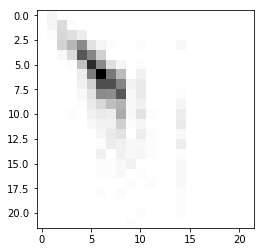

In [22]:
import matplotlib.pyplot as plt

plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [115]:
len(mlp.coefs_)

4

In [116]:
len(mlp.coefs_[0])

8

In [117]:
len(mlp.intercepts_[0])

9